<a href="https://colab.research.google.com/github/Amitarajak/speech_emotion2/blob/main/original_without_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***`Topic:Speech emotion recognition with demos datasets (italian speakers):DEMoS presents a corpus of induced emotional speech in Italian, addressing its underrepresentation in research. It includes 9385 emotional samples from 68 speakers, covering seven emotional states.`***

In [ ]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
#from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation

from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf
print ("Done")

Done


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
directory_path = '/content/drive/MyDrive/speach emotion'

In [ ]:
file_list = os.listdir(directory_path)

# Load each .wav file in the directory
for file_name in file_list:
    if file_name.endswith('.wav'):
        file_path = os.path.join(directory_path, file_name)
        audio_data, sr = librosa.load(file_path, sr=None)

## **Randomly uploading the audio file from the directory**

In [ ]:
import os
import random
import librosa
import IPython.display as ipd

# Directories containing the audio files
directory_paths = ['/content/drive/MyDrive/speach emotion/DEMOS']

# Get a list of all .wav files in the directories
wav_files = []
for directory_path in directory_paths:
    wav_files.extend([os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.wav')])

# Choosing a random .wav file from the list
random_wav_file = random.choice(wav_files)

# Loading the audio data and sampling rate
audio_data, sr = librosa.load(random_wav_file, sr=None)

# Playing the randomly selected audio file
ipd.Audio(audio_data, rate=sr)


In [ ]:
import os
import pandas as pd

paths = []
labels = []

# Defining the mapping of emotions to their corresponding codes
emotion_to_code = {
    'Guilt': 'col',
    'Disgust': 'dis',
    'Happiness': 'gio',
    'Fear': 'pau',
    'Anger': 'rab',
    'Surprise': 'sor',
    'Sadness': 'tri',

}

# Paths to the directories containing .wav files
directory_paths = ['/content/drive/MyDrive/speach emotion/DEMOS']

# Iterating over each directory
for directory_path in directory_paths:
    # Extracting the label from the directory name
    label = os.path.basename(directory_path)
    # Iterating over the files in the directory
    for root, dirs, files in os.walk(directory_path):
        for file_name in files:
            # Appending the file path to paths
            file_path = os.path.join(root, file_name)
            paths.append(file_path)
            # Using the file name to determine the emotion label
            emotion = None
            for emotion_name, emotion_code in emotion_to_code.items():
                if emotion_code in file_name:
                    emotion = emotion_name
                    break
            labels.append(emotion)

# Creating a DataFrame
df = pd.DataFrame({'speech': paths, 'label': labels})

# Displaying the DataFrame
print(df.head)


<bound method NDFrame.head of                                                  speech    label
0     /content/drive/MyDrive/speach emotion/DEMOS/PR...  Disgust
1     /content/drive/MyDrive/speach emotion/DEMOS/PR...  Disgust
2     /content/drive/MyDrive/speach emotion/DEMOS/PR...  Disgust
3     /content/drive/MyDrive/speach emotion/DEMOS/PR...  Disgust
4     /content/drive/MyDrive/speach emotion/DEMOS/PR...  Disgust
...                                                 ...      ...
9380  /content/drive/MyDrive/speach emotion/DEMOS/NP...     Fear
9381  /content/drive/MyDrive/speach emotion/DEMOS/NP...    Anger
9382  /content/drive/MyDrive/speach emotion/DEMOS/NP...    Anger
9383  /content/drive/MyDrive/speach emotion/DEMOS/NP...    Anger
9384  /content/drive/MyDrive/speach emotion/DEMOS/NP...    Anger

[9385 rows x 2 columns]>


In [ ]:
label_counts = df['label'].value_counts()
print(label_counts)

label
Disgust      1693
Sadness      1530
Anger        1477
Happiness    1395
Fear         1156
Guilt        1134
Surprise     1000
Name: count, dtype: int64


# Data visualization:Plottation of different emotions

<ipython-input-9-e7b907fa82ba>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


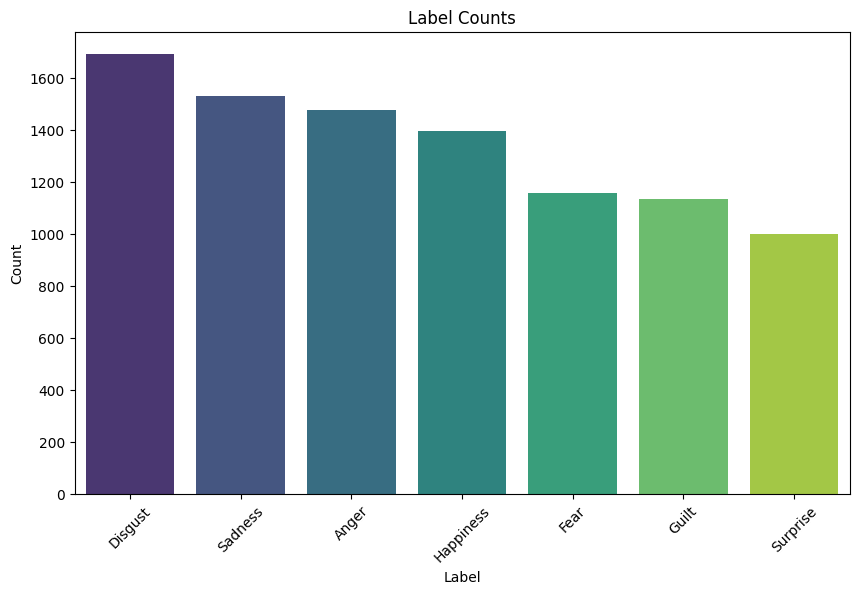

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Counting the occurrences of each label
label_counts = df['label'].value_counts()

# Creating a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Label Counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Waveplot and spectrogramAxis Interpretation:
Horizontal Axis (X-axis): Represents time. Each point on the x-axis corresponds to a specific moment in time. The units of time (e.g., seconds, milliseconds) depend on the sampling rate or time scale of the signal.
Vertical Axis (Y-axis): Represents amplitude. It indicates the magnitude or strength of the signal at each point in time. The units of amplitude depend on the type of signal being analyzed (e.g., voltage for electrical signals, pressure for audio signals).The waveform's shape depicts how the signal's amplitude changes over time.
**spectogram**:A spectrogram visualizes how the frequency content of a signal changes over time. The horizontal axis typically represents time, while the vertical axis represents frequency. The color intensity or brightness at each point in the spectrogram indicates the magnitude or strength of the frequency component at that time-frequency bin.**The decibel scale is logarithmic**



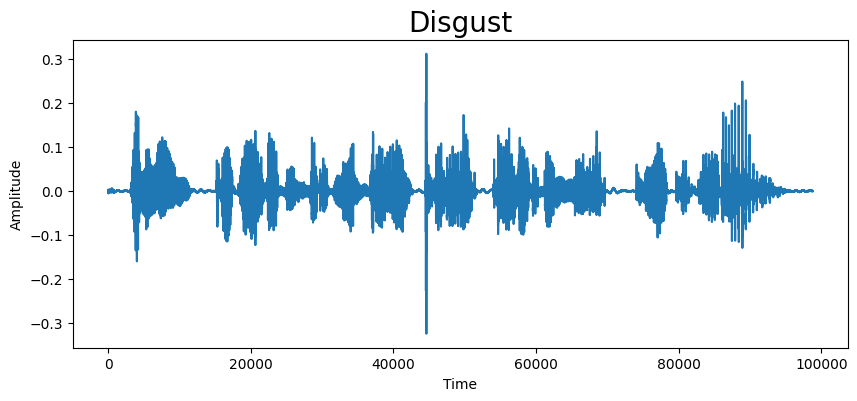

<ipython-input-11-3ec9b775566f>:17: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(data)), sr=sr, x_axis='time', y_axis='hz')


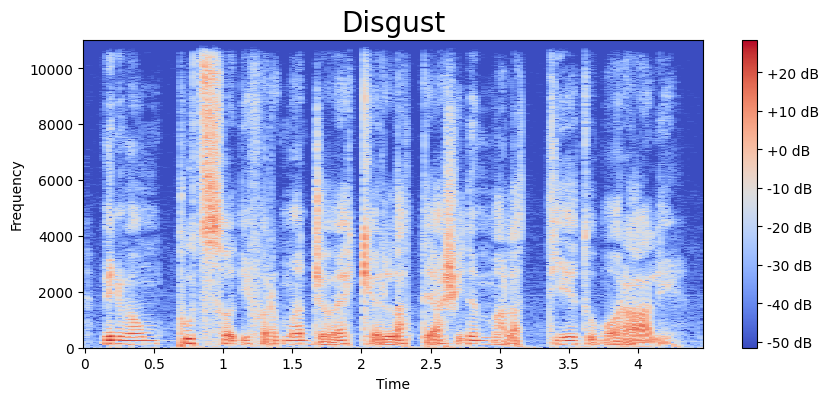

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

# Functioning to plot the waveform
def waveplot(data, sr, emotion):#This line defines a function called waveplot which takes three parameters: data, sr, and emotion.data: This parameter represents the audio signal data.
    plt.figure(figsize=(10, 4))  #sr: This parameter represents the sampling rate (number of samples per second) of the audio signal.
    plt.title(emotion, size=20)  #emotion: This parameter represents the emotion label for the title of the plot.
    plt.plot(data)               #(sr=samples per second=In digital audio, sound is represented as a series of discrete samples, where each sample corresponds to the amplitude of the audio waveform at a particular point in time. The sampling rate, measured in Hz, determines how frequently these samples are taken per second.)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

# Functioning to plot the spectrogram
def spectrogram(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(data)), sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()

# Now we can use these functions to visualize the waveform and spectrogram
emotion = 'Disgust'
filtered_df = df[df['label'] == emotion]
if not filtered_df.empty:
    paths = filtered_df['speech'].iloc[0]  # Getting the path of the first matching row
    data, sampling_rate = librosa.load(paths)
    waveplot(data, sampling_rate, emotion)
    spectrogram(data, sampling_rate, emotion)
else:
    print(f"No data found for emotion: {emotion}")

Audio(paths)


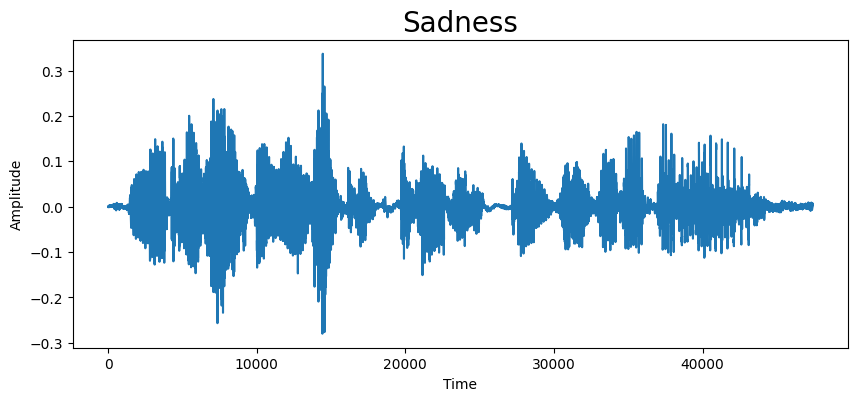

<ipython-input-25-3ec9b775566f>:17: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(data)), sr=sr, x_axis='time', y_axis='hz')


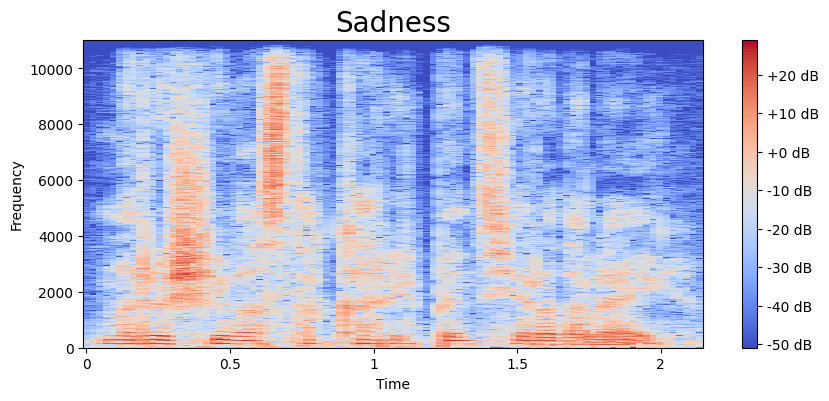

In [ ]:
emotion = 'Sadness'
filtered_df = df[df['label'] == emotion]
if not filtered_df.empty:
    paths = filtered_df['speech'].iloc[0]  # Getting the path of the first matching row
    data, sampling_rate = librosa.load(paths)
    waveplot(data, sampling_rate, emotion)
    spectrogram(data, sampling_rate, emotion)
else:
    print(f"No data found for emotion: {emotion}")

Audio(paths)

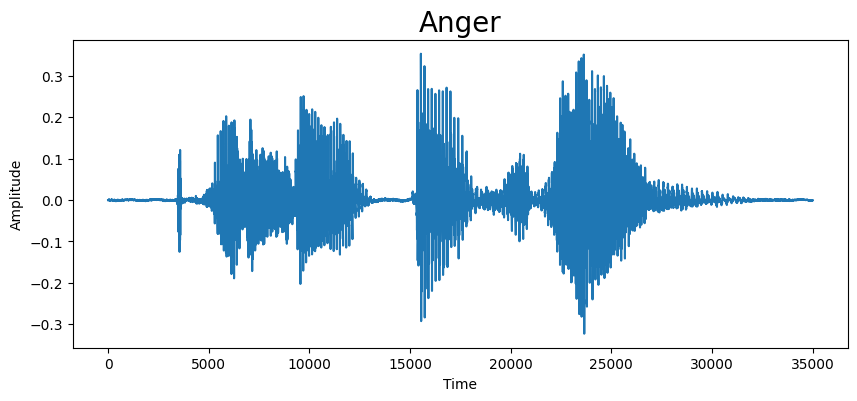

<ipython-input-9-3ec9b775566f>:17: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(data)), sr=sr, x_axis='time', y_axis='hz')


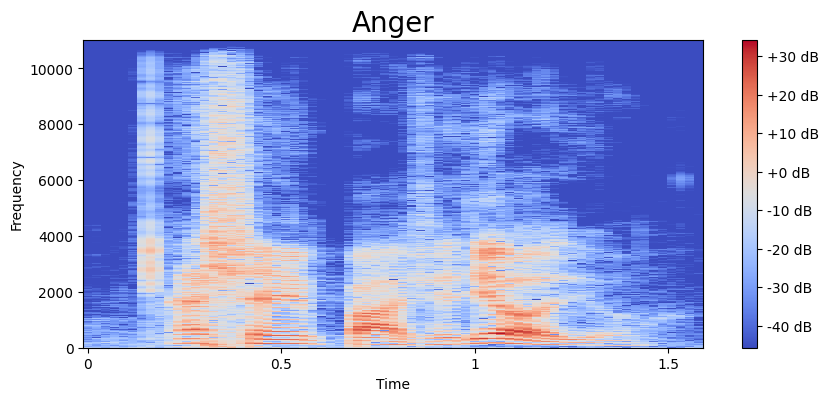

In [ ]:
emotion = 'Anger'
filtered_df = df[df['label'] == emotion]
if not filtered_df.empty:
    paths = filtered_df['speech'].iloc[0]  # Getting the path of the first matching row
    data, sampling_rate = librosa.load(paths)
    waveplot(data, sampling_rate, emotion)
    spectrogram(data, sampling_rate, emotion)
else:
    print(f"No data found for emotion: {emotion}")

Audio(paths)

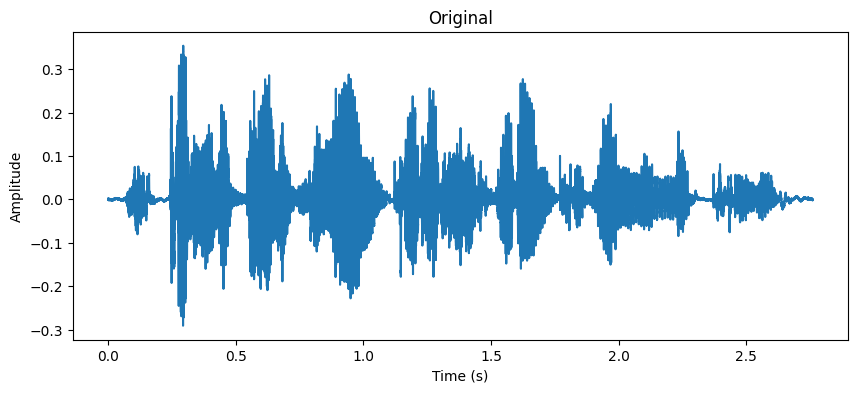

In [ ]:
import os
import random
import librosa
import numpy as np
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt

def visualize_waveform(data, sr, title):
    plt.figure(figsize=(10, 4))
    plt.title(title)
    plt.plot(np.arange(len(data)) / sr, data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()
# Directories containing the original audio files
directory_paths = ['/content/drive/MyDrive/speach emotion/DEMOS']

# Choosing a random directory
directory_path = random.choice(directory_paths)

# Getting a list of all .wav files in the directory
wav_files = [file for file in os.listdir(directory_path) if file.endswith('.wav')]

# Choosing a random .wav file from the list
random_wav_file = random.choice(wav_files)

# Constructing the full path to the randomly selected .wav file
random_wav_path = os.path.join(directory_path, random_wav_file)

# Loading the original audio data and sampling rate
original_audio_data, sr = librosa.load(random_wav_path, sr=None)
visualize_waveform(original_audio_data, sr, 'Original')


In [ ]:
print("Playing original audio...")
ipd.display(ipd.Audio(original_audio_data, rate=sr))

Playing original audio...


# Defining **MFCC**:Mel-frequency cepstral coefficients (MFCCs):**Pre-processing**: Before extracting MFCCs, the audio signal is typically pre-processed to enhance relevant features and reduce noise. This may involve steps such as framing (dividing the signal into short overlapping frames), windowing (applying a window function to each frame), and optionally applying pre-emphasis (boosting high-frequency components).**discrete Fourier Transform (FFT)**: The DFT is used to transform each framed audio signal from the time domain into the frequency domain.**.Mel Filtering:** The audio spectrum is divided into mel-scale frequency bands. The mel scale is a perceptual scale that approximates the human auditory system's response to different frequencies.**Logarithmic Transformation: **The logarithm of the energy in each mel-frequency band is computed. This transformation is applied to mimic the non-linear human perception of sound intensity.**Discrete Cosine **Transform (DCT): The resulting mel-frequency spectrum is transformed into the cepstral domain using the Discrete Cosine Transform (DCT).Feature Extraction: Typically, only the lower-frequency cepstral coefficients are retained, as they contain the most relevant information for speech and audio processing tasks.**Feature Normalization**: Optionally, the MFCCs may undergo mean normalization or other forms of feature scaling.**Final Feature Vector:** The resulting MFCCs form a feature vector that summarizes the spectral characteristics of the audio signal over time.

In [ ]:
def extract_mfcc(filename):#extracting features using mfcc
    y, sr = librosa.load(filename, duration=3, offset=0.5)#Specifies the duration of audio to load, in seconds.offset=0.5: Specifies the start time from which to load the audio, in seconds.y will contain the audio waveform data, and sr will contain the sampling rate of the audio file.
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)#n_mfcc=40: Specifies the number of MFCC coefficients to compute. In this case, it computes 40 coefficients.T: Transposes the resulting MFCC matrix so that the time axis becomes the first dimension.np.mean(..., axis=0): Calculates the mean along the time axis of the transposed MFCC matrix, resulting in a single vector representing the average MFCC values across the audio file.
    return mfcc                 #mfcc: Represents the computed MFCC vector.mfcc will contain the average MFCC values computed from the audio waveform y

# **Extracting features from MFCC**

In [ ]:
extract_mfcc(df['speech'][0])#unction call loads the audio file specified in the first row of the 'speech' column of the DataFrame df, computes its MFCCs, and returns a vector representing the average MFCC values across the audio file.

array([-3.3760892e+02,  9.9779739e+01,  2.3567944e+00,  4.2775032e+01,
       -3.6495319e-01,  2.7663615e+00, -5.0751472e-01, -4.7880616e+00,
       -2.6101303e+00, -7.0645065e+00, -2.8844144e+00,  4.0629153e+00,
       -1.4669511e+01,  4.6779256e+00, -4.3118472e+00,  1.0805051e+00,
       -2.6784258e+00,  2.3730373e+00, -3.2933843e+00,  5.0803924e-01,
       -5.2729859e+00,  1.3578894e+00, -4.6348748e+00, -1.5376509e+00,
       -1.6052009e+00,  2.3670168e+00, -3.9803851e+00,  2.8498743e+00,
       -1.5378388e+00, -1.0239713e-01,  3.2229185e-01,  1.0485220e+00,
       -1.6222267e+00,  1.2094985e-01, -9.9888778e-01, -1.5226415e+00,
       -2.8215153e+00,  9.8566329e-01, -1.3136156e+00, -9.6152657e-01],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))# this line of code computes MFCCs for each audio file in the DataFrame df and stores the resulting MFCC vectors in the variable X_mfcc.

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1687
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1167
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1983
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1044
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=735
  warnings.warn(


In [ ]:
X_mfcc

0       [-337.60892, 99.77974, 2.3567944, 42.775032, -...
1       [-286.69064, 89.27793, 16.096453, 31.055233, -...
2       [-254.64018, 95.59651, 11.076423, 37.952118, -...
3       [-318.06418, 99.45126, 1.1243258, 33.03337, -1...
4       [-256.77127, 113.587906, 9.686279, 45.194675, ...
                              ...                        
9380    [-282.2696, 99.04067, -14.457063, 36.26681, -5...
9381    [-294.10812, 84.6454, -9.05183, 41.876865, -11...
9382    [-347.59024, 134.94492, -16.062109, 33.563705,...
9383    [-295.45798, 84.98409, 5.9041944, 36.211628, 1...
9384    [-278.75345, 69.40264, 5.62994, 40.10515, -5.1...
Name: speech, Length: 9385, dtype: object

The selected features might lack discriminative power or fail to capture important characteristics of the audio signals that are crucial for accurate prediction.40 features are very less to get good prediction.may need to experiment with different feature subsets or feature selection techniques to identify the most informative features for your task.

In [ ]:
Xmn = [x for x in X_mfcc]#these lines of code convert the list of MFCC vectors stored in X_mfcc into a NumPy array Xmn, which can then be used for further numerical computations or analysis.
Xmn = np.array(Xmn)
Xmn.shape

(9385, 40)

In [ ]:
Xm = np.expand_dims(Xmn, -1)
Xm.shape

(9385, 40, 1)

One-hot encoding transforms categorical variables into a format that can be readily processed by machine learning models.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

# Storing the features value in the dataframe

In [ ]:
import pandas as pd
import numpy as np

# Converting the sparse array y to a dense array

# Creating a DataFrame with Xmn
Emotions = pd.DataFrame(Xmn)

# Adding a column for each emotion label
for i in range(y.shape[1]):
    Emotions[f'Emotion_{i}'] = y[:, i]

# Saving the DataFrame to a CSV file
Emotions.to_csv('/content/drive/My Drive/emotion.csv', index=False)

# Displaying the first few rows of the DataFrame
Emotions.head()


,0,1,2,3,4,5,6,7,8,9,...,37,38,39,Emotion_0,Emotion_1,Emotion_2,Emotion_3,Emotion_4,Emotion_5,Emotion_6
0,-337.608917,99.779739,2.356794,42.775032,-0.364953,2.766361,-0.507515,-4.788062,-2.610130,-7.064507,...,0.985663,-1.313616,-0.961527,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-286.690643,89.277931,16.096453,31.055233,-2.213346,0.276460,-2.777179,2.729440,-2.007527,-1.233467,...,0.418253,0.229793,0.311762,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-254.640182,95.596512,11.076423,37.952118,-3.112264,4.093908,-3.898279,1.592007,0.338576,-2.726679,...,2.186349,-1.552365,0.567398,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-318.064178,99.451263,1.124326,33.033371,-1.633774,0.685702,-1.103468,-0.042994,-3.266693,-3.928703,...,-0.988182,-0.862840,-0.651756,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-256.771271,113.587906,9.686279,45.194675,2.013873,-0.199287,-5.546776,0.328113,-0.321685,-4.160002,...,0.548225,-1.033484,-0.243447,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y.shape

(9385, 7)

In [ ]:
Xm.shape

(9385, 40, 1)

# splitting the data **set**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Xmn, y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7508, 40), (7508, 7), (1877, 40), (1877, 7))

# Scaling the X datasets:-It standardizes the features by removing the mean and scaling to unit variance, ensuring that the features have a mean of 0 and a standard deviation of 1

1.   standardization x'=x-mean(x)/ver(x) :mean(x')=0,ver(x')=1,unbounded
  



In [ ]:
from sklearn.preprocessing import StandardScaler#It standardizes the features by removing the mean and scaling to unit variance, ensuring that the features have a mean of 0 and a standard deviation of 1

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transform it
x_train_scaled = scaler.fit_transform(x_train)

# Transforming the test data using the same scaler
x_test_scaled = scaler.transform(x_test)
x_train_scaled.shape,x_test_scaled.shape


((7508, 40), (1877, 40))

# Implementing Logistic regression:

1.   Supervised learning:Machine trained with a set of labelled datas which means input data is paired with desired outputs .There are two types1.regression 2.classification .This problem relates with multi class classification.
2. Classification:Model is fully trained using the training data and then evaluted on test data before being used to perform prediction on unseen data.
3. Multiclass classification:More than two classes are  mutually exclusive.
4.Logistic regression is used here although it is used for binary classification but it is extended to handle multi class classification.   
5.Hypothesis:fw,b(x)=1/1+e^z    {z=w.x+b)
6.cost function=j(w,b)=1/m sum(i=1 to m)[-ylogf(w,b)(x(i))+(1-y(i)log(1-f(w,b)(x(i))
7.Gradient descent:-w(j(new)=w(j(old))-alpha.1/m summation(i=1 to m)(f(w,b)x(i)-y(i))xj(i)
  b(j(new)=b(j(old)-alpha.1/m summation(i=1 to m)(f(w,b)x(i)-y(i)xj(i)
8.alpha is the learning rate=Monitor gradient descent  


In [ ]:
from sklearn.linear_model import LogisticRegression

# Creating an instance of Logistic Regression
lr = LogisticRegression(max_iter=5000)  # You may need to increase max_iter for convergence

# Flattening the multi-label y_train and y_test to make them compatible with Logistic Regression
y_train_flat = y_train.argmax(axis=1)
y_test_flat = y_test.argmax(axis=1)

# Training the Logistic Regression model
lr.fit(x_train_scaled, y_train_flat)

# Predicting the labels for the test set
y_pred = lr.predict(x_test_scaled)

# Evaluating the model
accuracy = lr.score(x_test_scaled, y_test_flat)
print("Accuracy:", accuracy)


Accuracy: 0.31326584976025573




> Conclusion of logistic regression:The accuracy indicates that only about 31.3% of the instances in the test set are correctly classified by the model.  
*  Model Complexity: Logistic regression might be too simple to capture the underlying patterns in the data adequately, especially if the relationships between features and classes are complex.
Feature Engineering: The features used for training the model may not be informative enough to distinguish between the different classes effectively.




# ***`***`Implementing Random forest`***:Random Forest is a powerful and versatile machine learning algorithm that is used for both classification and regression tasks.
Robust to Overfitting: Random Forest mitigates overfitting by aggregating the predictions of multiple decision trees. Each tree is trained on a random subset of the data and features, reducing the likelihood of capturing noise or spurious patterns in the data.
```



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creating an instance of Random Forest Classifier
rf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Flattening the multi-label y_train and y_test to make them compatible with Random Forest
y_train_flat = y_train.argmax(axis=1)
y_test_flat = y_test.argmax(axis=1)

# Training the Random Forest model
rf.fit(x_train_scaled, y_train_flat)

# Predicting the labels for the test set
y_pred = rf.predict(x_test_scaled)

# Evaluating the model
accuracy = rf.score(x_test_scaled, y_test_flat)
print("Accuracy:", accuracy)


Accuracy: 0.472562599893447


# LSTM-long short term memory:Long Short-Term Memory (LSTM) networks are a type of recurrent neural network (RNN) architecture designed to model sequential data and capture long-term dependencies.** sequential data**:They can effectively capture temporal dependencies and patterns in the input sequences.**Memory Cells**: The core components of an LSTM network are memory cells, which store information over time and control the flow of information through the network.Gate Mechanisms: LSTMs incorporate gate mechanisms that regulate the flow of information into and out of memory cells forget gate,input gate,output gate

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Defining the model architecture with adjustments
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.5),  # Increased dropout rate
    Dense(128, activation='relu'),
    Dropout(0.5),  # Increased dropout rate
    Dense(64, activation='relu'),
    Dropout(0.5),  # Increased dropout rate
    Dense(7, activation='softmax')
])

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['categorical_accuracy'])
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:


# Training the model with adjusted parameters
history = model.fit(x_train_scaled, y_train, epochs=100, batch_size=128)


Epoch 1/100
59/59 [==============================] - 19s 323ms/step - loss: 1.8504 - categorical_accuracy: 0.2603
Epoch 2/100
59/59 [==============================] - 17s 285ms/step - loss: 1.8479 - categorical_accuracy: 0.2611
Epoch 3/100
59/59 [==============================] - 17s 296ms/step - loss: 1.8472 - categorical_accuracy: 0.2628
Epoch 4/100
59/59 [==============================] - 18s 302ms/step - loss: 1.8410 - categorical_accuracy: 0.2678
Epoch 5/100
59/59 [==============================] - 17s 281ms/step - loss: 1.8429 - categorical_accuracy: 0.2631
Epoch 6/100
59/59 [==============================] - 17s 280ms/step - loss: 1.8432 - categorical_accuracy: 0.2649
Epoch 7/100
59/59 [==============================] - 16s 279ms/step - loss: 1.8393 - categorical_accuracy: 0.2605
Epoch 8/100
59/59 [==============================] - 16s 280ms/step - loss: 1.8370 - categorical_accuracy: 0.2652
Epoch 9/100
59/59 [==============================] - 18s 311ms/step - loss: 1.8405 - cat

In [ ]:
# Evaluating the model on the testing data
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print(f'Testing Loss: {loss}, Testing Accuracy: {accuracy}')


59/59 [==============================] - 3s 44ms/step - loss: 1.7886 - categorical_accuracy: 0.3207
Testing Loss: 1.7885701656341553, Testing Accuracy: 0.3207245469093323


conclusion :It takes very long time to converge .The training process may be hindered by the vanishing or exploding gradient problem.

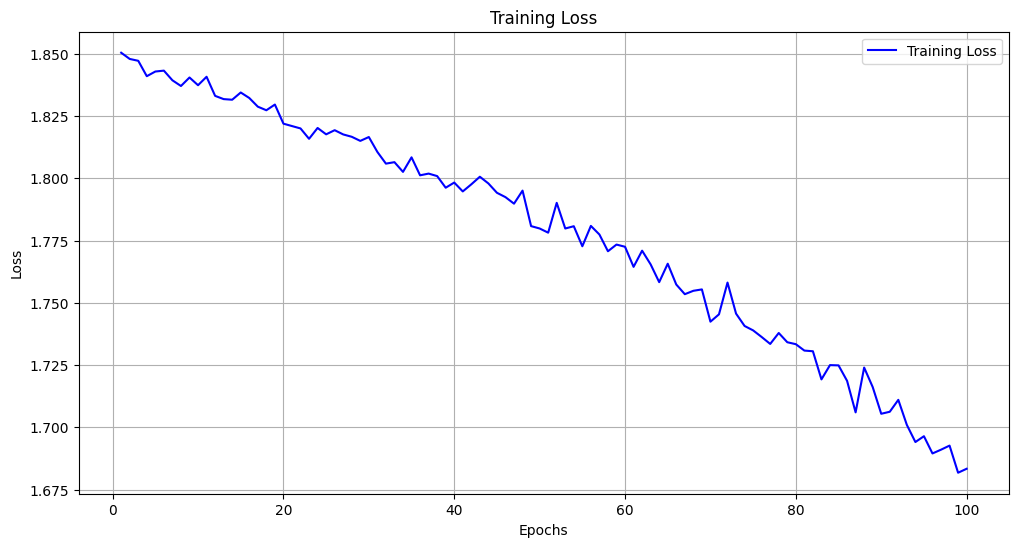

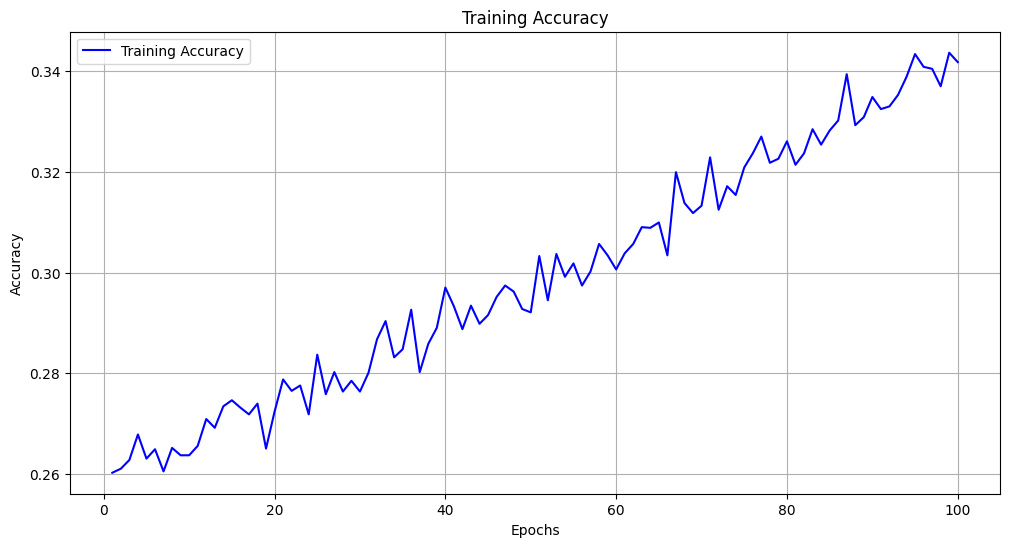

In [ ]:
import matplotlib.pyplot as plt

# Extracting loss and accuracy values from the history object
train_loss = history.history['loss']
train_acc = history.history['categorical_accuracy']

# Creating a range of epochs for plotting
epochs = range(1, len(train_loss) + 1)

# Plotting the training loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the training accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

# Assuming x_time_scaled is your input data and model is your trained LSTM model
encoder=LabelEncoder()
# Reshaping the input data
x_test_scaled_reshaped = x_test_scaled.reshape((1877, 40, 1))

# Predicting using the LSTM model
pred_time = model.predict(x_test_scaled_reshaped)
y_train_1d = np.argmax(y_train, axis=1)


encoder.fit(y_train_1d)

# Inversing transform the predicted labels
y_pred_time = encoder.inverse_transform(np.argmax(pred_time, axis=1))
y_test_1d = np.argmax(y_test, axis=1)
# Assuming y_test is your true labels
# Inverse transform the original labels
y_test_inverse = encoder.inverse_transform(y_test_1d)

# Check for random predictions
df_time = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df_time['Predicted Labels'] = y_pred_time.flatten()
df_time['Actual Labels'] = y_test_inverse.flatten()

df_time.head(10)


59/59 [==============================] - 11s 180ms/step


,Predicted Labels,Actual Labels
0,2,4
1,4,5
2,2,5
3,2,0
4,2,4
5,0,4
6,0,5
7,6,5
8,4,0
9,0,0


# Bidirectional LSTM for better capturing the emotions:Forward and Backward Passes: In a standard LSTM, input sequences are processed from left to right (forward pass). In a bidirectional LSTM, input sequences are processed in both forward and backward directions simultaneously. This means that the input sequence is fed into two separate LSTM layers: one that reads the sequence from left to right and another that reads it from right to left.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score

# Defining the model architecture with Bidirectional LSTM layers
model3 = Sequential([
    Bidirectional(LSTM(256, return_sequences=True), input_shape=(40, 1)),
    Dropout(0.5),  # Increased dropout rate
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.5),  # Increased dropout rate
    Bidirectional(LSTM(64)),
    Dropout(0.5),  # Increased dropout rate
    Dense(7, activation='softmax')
])

# Compiling the model
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirecti  (None, 40, 512)           528384    
 onal)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 40, 512)           0         
                                                                 
 bidirectional_4 (Bidirecti  (None, 40, 256)           656384    
 onal)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 40, 256)           0         
                                                                 
 bidirectional_5 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                      

Early stopping is a technique used in machine learning, particularly during the training of neural networks, to prevent overfitting and improve generalization performance.
Batch_size:particularly in the context of training neural networks, the batch size refers to the number of training examples utilized in one iteration of gradient descent during the optimization process.

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

In [ ]:
hist = model3.fit(x_train_scaled, y_train, validation_split=0.1, epochs=50, batch_size=128)

Epoch 1/50
53/53 [==============================] - 104s 2s/step - loss: 1.9092 - accuracy: 0.2065 - val_loss: 1.8650 - val_accuracy: 0.2423
Epoch 2/50
53/53 [==============================] - 81s 2s/step - loss: 1.8855 - accuracy: 0.2353 - val_loss: 1.8532 - val_accuracy: 0.2570
Epoch 3/50
53/53 [==============================] - 87s 2s/step - loss: 1.8729 - accuracy: 0.2398 - val_loss: 1.8478 - val_accuracy: 0.2703
Epoch 4/50
53/53 [==============================] - 80s 2s/step - loss: 1.8591 - accuracy: 0.2587 - val_loss: 1.8239 - val_accuracy: 0.2836
Epoch 5/50
53/53 [==============================] - 86s 2s/step - loss: 1.8386 - accuracy: 0.2671 - val_loss: 1.8150 - val_accuracy: 0.2703
Epoch 6/50
53/53 [==============================] - 82s 2s/step - loss: 1.8300 - accuracy: 0.2731 - val_loss: 1.8106 - val_accuracy: 0.2823
Epoch 7/50
53/53 [==============================] - 82s 2s/step - loss: 1.8179 - accuracy: 0.2804 - val_loss: 1.8392 - val_accuracy: 0.2730
Epoch 8/50
53/53 [=

In [ ]:
loss, accuracy = model3.evaluate(x_test_scaled, y_test)
print(f'Testing Loss: {loss}, Testing Accuracy: {accuracy}')


59/59 [==============================] - 11s 180ms/step - loss: 2.1248 - accuracy: 0.3404
Testing Loss: 2.1247634887695312, Testing Accuracy: 0.3404368758201599


Insufficient data:dataset is small, noisy, or unrepresentative of the underlying data distribution, the model may struggle to learn meaningful patterns. Increasing the size or diversity of the dataset may help improve generalization performance.

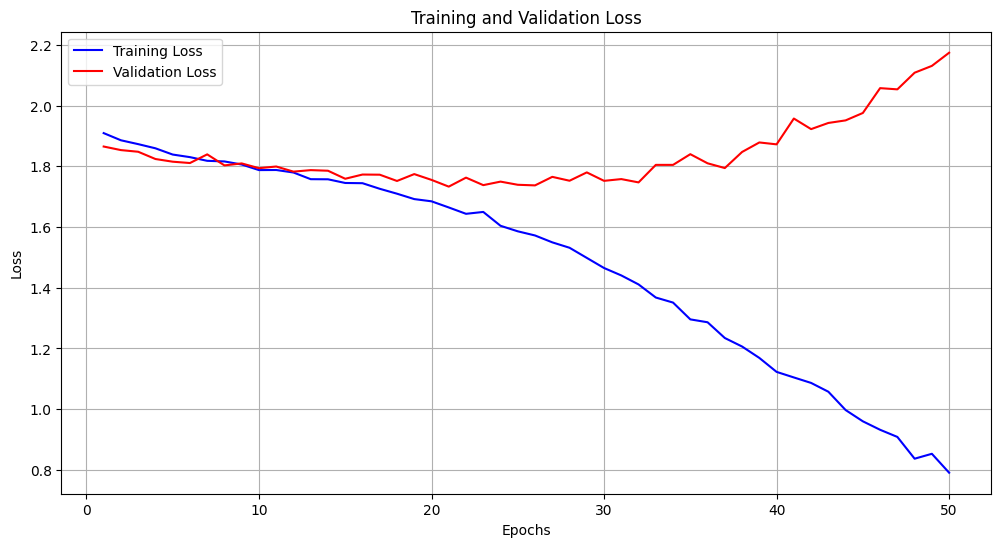

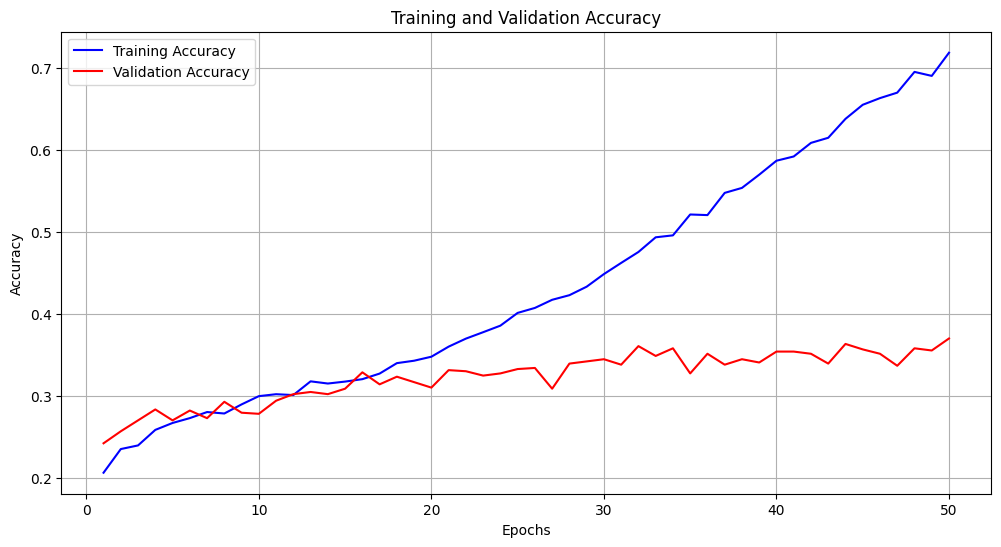

In [ ]:
import matplotlib.pyplot as plt

# Extracting loss and accuracy values from the history object
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

# Creating a range of epochs for plotting
epochs = range(1, len(train_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Convalutional neural network :Local Feature Extraction: CNNs excel at capturing local patterns and structures within data. In the context of NLP, this translates to identifying meaningful n-gram features or word sequences within sentences or documents. CNNs can automatically learn to detect useful linguistic patterns, such as word combinations or syntactic structures, which can be valuable for tasks like sentiment analysis, text classification, or named entity recognition.CNNs can efficiently process inputs of variable lengths.In NLP, parameter sharing allows CNNs to capture meaningful features at different granularities, from individual words to larger phrases or sentences.

In [ ]:
x_traincnn =np.expand_dims(x_train_scaled, axis=2)
x_testcnn= np.expand_dims(x_test_scaled, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((7508, 40, 1), (7508, 7), (1877, 40, 1), (1877, 7))

In [ ]:
import tensorflow.keras.layers as L

model01 = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(40,1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),

    #L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    #L.BatchNormalization(),
   # L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer

    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])


model01.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model01.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 40, 512)           3072      
                                                                 
 batch_normalization_14 (Ba  (None, 40, 512)           2048      
 tchNormalization)                                               
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 20, 512)           0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 20, 512)           1311232   
                                                                 
 batch_normalization_15 (Ba  (None, 20, 512)           2048      
 tchNormalization)                                               
                                                      

In [ ]:
histt=model01.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=64)

Epoch 1/50
118/118 [==============================] - 67s 534ms/step - loss: 2.2049 - accuracy: 0.1846 - val_loss: 2.3071 - val_accuracy: 0.1630
Epoch 2/50
118/118 [==============================] - 65s 543ms/step - loss: 1.9705 - accuracy: 0.2223 - val_loss: 3.1005 - val_accuracy: 0.1822
Epoch 3/50
118/118 [==============================] - 64s 546ms/step - loss: 1.8917 - accuracy: 0.2549 - val_loss: 2.3063 - val_accuracy: 0.1801
Epoch 4/50
118/118 [==============================] - 65s 552ms/step - loss: 1.8533 - accuracy: 0.2613 - val_loss: 2.0751 - val_accuracy: 0.1913
Epoch 5/50
118/118 [==============================] - 60s 512ms/step - loss: 1.8186 - accuracy: 0.2872 - val_loss: 1.9337 - val_accuracy: 0.2238
Epoch 6/50
118/118 [==============================] - 65s 551ms/step - loss: 1.7770 - accuracy: 0.3079 - val_loss: 1.8650 - val_accuracy: 0.2824
Epoch 7/50
118/118 [==============================] - 62s 524ms/step - loss: 1.7639 - accuracy: 0.3187 - val_loss: 1.8140 - val_ac

59/59 [==============================] - 9s 143ms/step - loss: 2.6187 - accuracy: 0.4124
Accuracy of our model on test data :  41.236016154289246 %


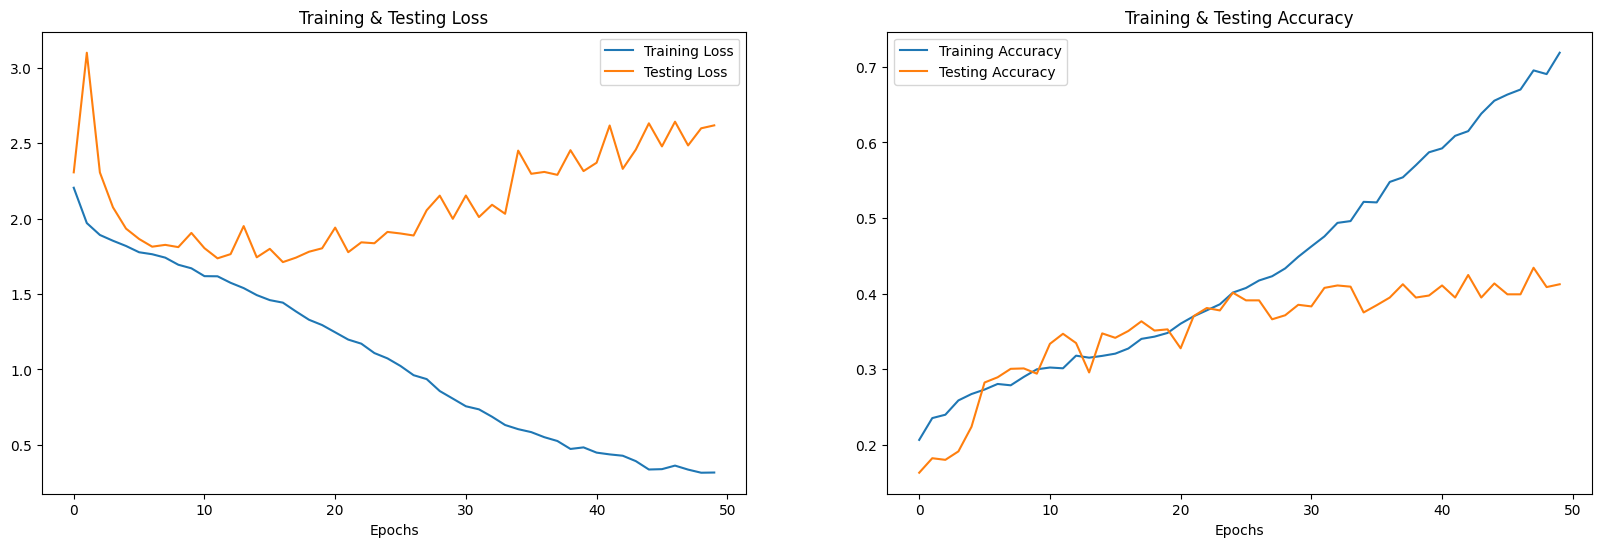

In [ ]:
print("Accuracy of our model on test data : " , model01.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = histt.history['loss']
test_acc = histt.history['val_accuracy']
test_loss = histt.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

encoder = LabelEncoder()
y_train_1d = np.argmax(y_train, axis=1)
# Fitting the LabelEncoder with the original labels

encoder.fit(y_train_1d)


# predicting on test data.
pred_test0 = model.predict(x_testcnn)
# Inversing transform the predicted labels
y_pred0 = encoder.inverse_transform(np.argmax(pred_test0, axis=1))
# Inversing transform the original labels and convert to 1D array
y_test0 = encoder.inverse_transform(np.argmax(y_test, axis=1)).flatten()

# Checking for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

59/59 [==============================] - 12s 200ms/step


,Predicted Labels,Actual Labels
0,2,4
1,4,5
2,2,5
3,2,0
4,2,4
5,0,4
6,0,5
7,6,5
8,4,0
9,0,0



Classification report:Class-wise Performance: The classification report breaks down the model's performance on a per-class basis, allowing to assess how well the model performs for each individual class in the dataset.

In [ ]:
class_report = classification_report(y_test0, y_pred0)

# Printing classification report
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.36      0.24       302
           1       0.13      0.01      0.01       342
           2       0.11      0.30      0.16       208
           3       0.18      0.19      0.19       220
           4       0.14      0.08      0.10       286
           5       0.40      0.03      0.05       315
           6       0.07      0.09      0.08       204

    accuracy                           0.14      1877
   macro avg       0.17      0.15      0.12      1877
weighted avg       0.18      0.14      0.11      1877



Conclusion:In most of the cases the model experienced overfitting .Although various regulations have been placed in earlier tryouts, they had restricted the accuracy from reaching its maximum value. A ModelCheckpoint is applied, saving the best weights according to the model's accuracy, thus the overfitting is bypassed.Even in future trying to use regularization method so that it can penalised the overfitting